In [1]:
### importing libraries
import pandas as pd
import numpy as np
import os
from librosa import display
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Audio
import pickle

In [2]:
### create dictionary
crema_emotions = {
    'nor':'Normal',
    'hate':'Hate'}

processed_data = []
data_path = 'C:/BE_final_project/Implementations/dataset'

for root, dirs, files in os.walk(data_path):
    for file in files:
        file_path = os.path.join(root, file)
        dataset = root.split('/')
        emotion = crema_emotions[file.split('_')[2]]
        processed_data.append([file_path, emotion])


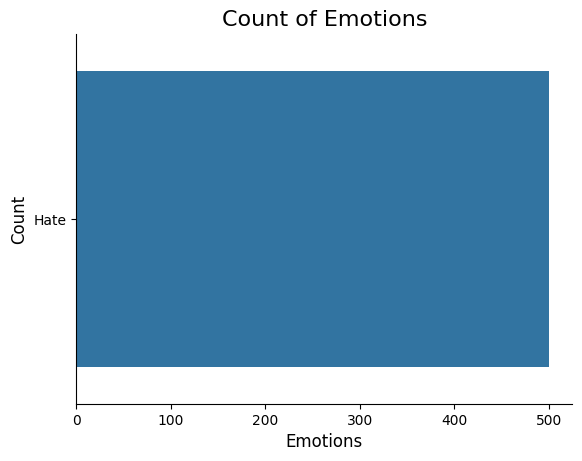

In [3]:
data_df = pd.DataFrame(processed_data, columns = ['File_path', 'Emotion'])
data_df.to_csv('C:/BE_final_project/Implementations/final_hate_speech_UI/data.csv')

plt.title('Count of Emotions', size=16)
sns.countplot(data_df.Emotion)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [4]:
import librosa


def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

In [5]:
def noise(data, random = False, rate = 0.035, threshold = 0.075):
    if random:
        rate = np.random.random() * threshold
    noise_amp = rate * np.random.uniform() * np.amax(data)
    data = data + noise_amp * np.random.normal(size = data.shape[0])
    return data


In [6]:
def stretch(data, rate = 8.2):
    return librosa.effects.time_stretch(data, rate)


C:\Users\Varun\AppData\Local\Temp\ipykernel_12408\2268593189.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  path = (data_df[data_df.Emotion == emotion].iloc[0])[0]


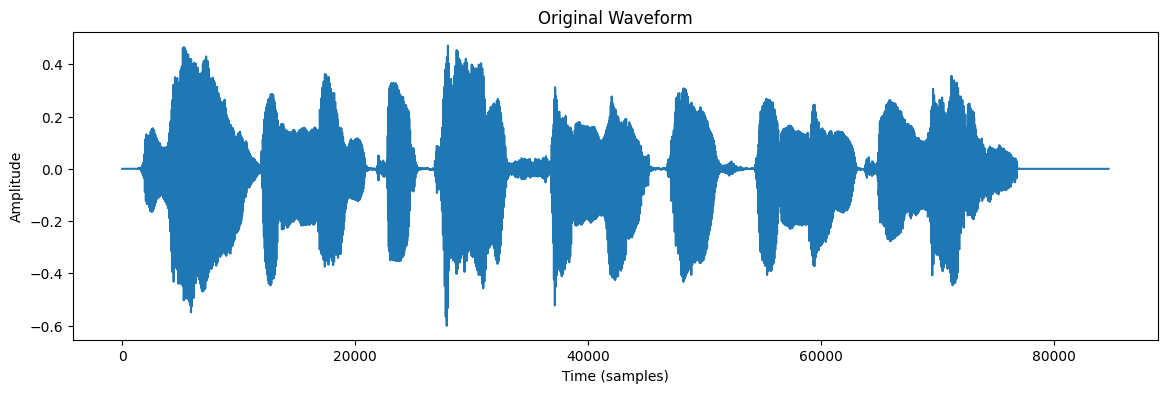

In [7]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

def shift(data, rate=1000):
    shift_range = int(np.random.uniform(low=-5, high=5) * rate)
    return np.roll(data, shift_range)

emotion = 'Hate'
path = (data_df[data_df.Emotion == emotion].iloc[0])[0]
data, sampling_rate = librosa.load(path)
data_copy = data.copy()  # Create a separate copy of the data

plt.figure(figsize=(14, 4))
plt.plot(data_copy)  # Use plt.plot to display the waveform
plt.title('Original Waveform')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.show()

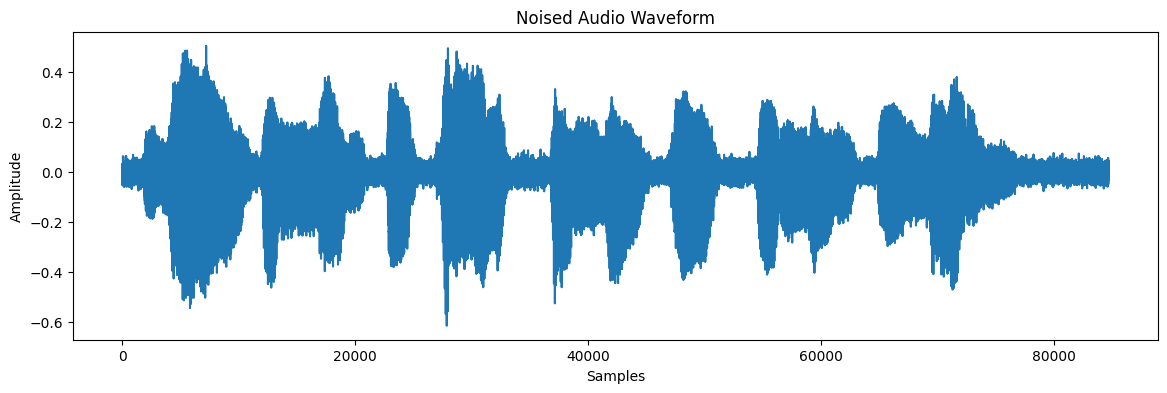

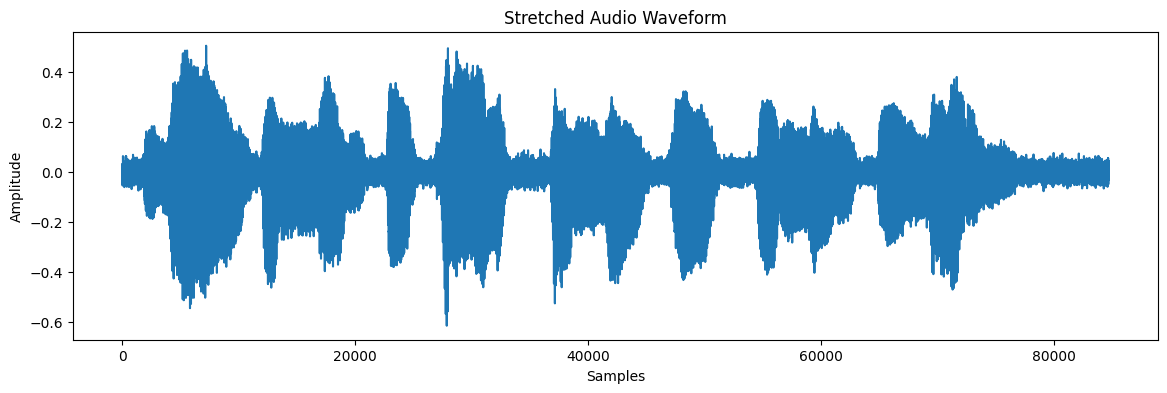

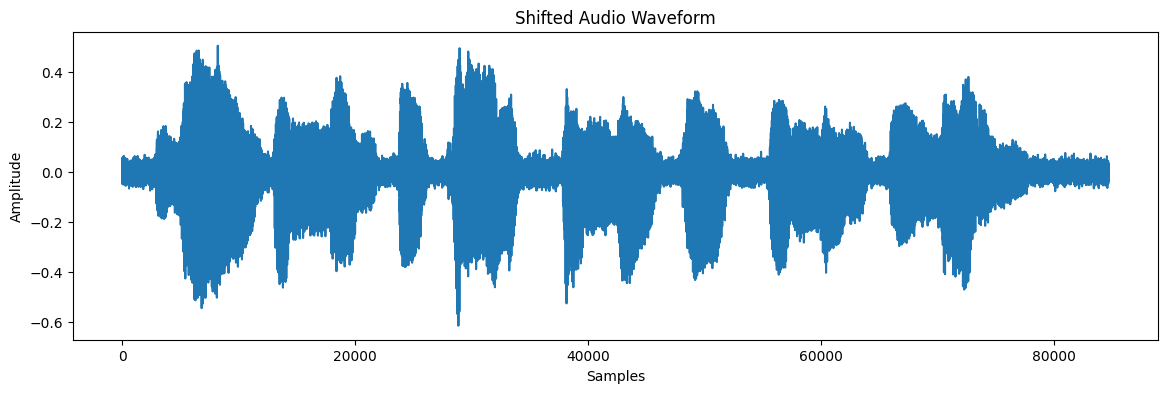

MFrequency Cepstral Coefficients: (3320,)
Feature processing...
Done.
(500, 41)


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import IPython.display as ipd

# Define your noise function
def noise(data, random=True):
    if random:
        # Add random noise
        noise = np.random.normal(0, 0.02, len(data))
        data += noise
    return data

# Assuming you have defined or loaded 'data' using your noise function
noised_data = noise(data)

plt.figure(figsize=(14, 4))
plt.plot(noised_data)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.title('Noised Audio Waveform')
plt.show()

# Assuming you want to listen to the noisy audio
ipd.Audio(noised_data, rate=sampling_rate)

def stretch(data, rate=1.0):
    # Implement your stretch function here
    # For simplicity, let's just return the original data
    return data

stretched_data = stretch(data, rate=0.5)
plt.figure(figsize=(14, 4))
plt.plot(stretched_data)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.title('Stretched Audio Waveform')
plt.show()
ipd.Audio(stretched_data, rate=sampling_rate)

def shift(data, shift_amount=1000):
    # Implement your shift function here
    # For simplicity, let's just shift the data by a fixed amount
    shifted_data = np.roll(data, shift_amount)
    return shifted_data

shifted_data = shift(data)
plt.figure(figsize=(14, 4))
plt.plot(shifted_data)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.title('Shifted Audio Waveform')
plt.show()
ipd.Audio(shifted_data, rate=sampling_rate)

def mfcc(data, sampling_rate):
    mfcc_feature = librosa.feature.mfcc(y=data, sr=sampling_rate)
    return np.ravel(mfcc_feature.T)

# Assuming you have defined or loaded 'data' and 'sampling_rate'
print("MFrequency Cepstral Coefficients:", mfcc(data, sampling_rate).shape)

def get_features(path, duration=2.5, offset=0.6):
    data, sampling_rate = librosa.load(path, duration=duration, offset=offset)
    return mfcc(data, sampling_rate)

# Assuming you have defined or loaded 'data_df' containing file paths and emotions
X, Y = [], []
print('Feature processing...')
for path, emotion in zip(data_df.File_path, data_df.Emotion):
    data, sampling_rate = librosa.load(path, duration=2.5, offset=0.6)
    mfcc_feature = np.mean(librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=40).T, axis=0)
    X.append(mfcc_feature)
    Y.append(emotion)
print('Done.')

features_path = 'features.csv'
extracted_df = pd.DataFrame(X)
extracted_df['labels'] = Y
extracted_df.to_csv(features_path, index=False)
print(extracted_df.shape)


In [9]:
from gtts import gTTS
  
# This module is imported so that we can 
# play the converted audio
import os
  
# The text that you want to convert to audio
mytext = 'Welcome to geeksforgeeks!'
  
# Language in which you want to convert
language = 'en'
  
# Passing the text and language to the engine, 
# here we have marked slow=False. Which tells 
# the module that the converted audio should 
# have a high speed
myobj = gTTS(text=mytext, lang=language, slow=False)
  
# Saving the converted audio in a mp3 file named
# welcome 
myobj.save("welcome.mp3")
  
# Playing the converted file
os.system("mpg321 welcome.mp3")



1